<a href="https://colab.research.google.com/github/huynv3/RTCMultiConnection/blob/master/Copie_de_Bienvenue_dans_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]
--------------------
[37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6  2.1  2.6  5.8 24.  35.1  7.6
 32.9 47.7 36.6 39.6 20.5 23.9 27.7  5.1 15.9 16.9 12.6  3.5 29.3 16.7
 27.1 16.  28.3 17.4  1.5 20.   1.4  4.1 43.8 49.4 26.7 37.7 22.3 33.4
 27.7  8.4 25.7 22.5  9.9 41.5 15.8 11.7  3.1  9.6 41.7 46.2 28.8 49.4
 28.1 19.2 49.6 29.5  2.  42.7 15.5 29.6 42.8  9.3 24.6 14.5 27.5 43.9
 30.6 14.3 33.   5.7 24.

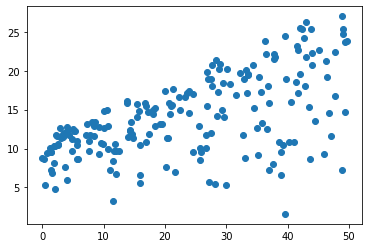

[86.42444871530395, 54.81620707415582, 46.16606399414465, 43.7837062962731, 43.112532699857724, 42.90855123523333, 42.83214120342931, 42.79058316020948, 42.758563860080905, 42.72917253849223, 42.70052246892831, 42.67209853116381, 42.64376006550058, 42.61546864326576, 42.587213745780765, 42.55899247407067, 42.53080400943763, 42.50264810114907, 42.474524653563066, 42.44643361341033, 42.41837493902088, 42.3903485919226, 42.362354534547855, 42.33439272960688, 42.306463139917156, 42.278565728356305, 42.250700457849696, 42.222867291366526, 42.195066191919175, 42.167297122562616, 42.139560046394465, 42.11185492655486, 42.08418172622646, 42.05654040863422, 42.02893093704554, 42.001353274770096, 41.97380738515992, 41.94629323160928, 41.91881077755439, 41.891359986473915, 41.86394082188836, 41.836553247360364, 41.80919722649443, 41.78187272293718, 41.75457970037698, 41.727318122544084, 41.70008795321051, 41.67288915619005, 41.645721695338125, 41.61858553455179, 41.59148063776986, 41.564406968972

In [ ]:
# Chạy B1 để tranning dữ liệu
# Bài toán ước lượng chi số bán dựa vào chi phí quảng cáo trên radio 

# với bài toán này có 2 dữ liệu liên quan là radio và sales =>
# đồ thị hàm số sẽ là một đường thẳng y = ax+b (y = ax +b) 
# với y là dữ liệu sale 
# x là dữ liệu radio 
# nhiệm vụ của bài toán trong trường hợp này là tìm được a và b với sai số gần nhỏ nhất 
# Biểu diễn trong phương trình hồi quy tuyến tính ta có như sau :
# sales = weight*radio + bias 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
import numpy as np 

# dữ liệu 
dataframe = pd.read_csv("./sample_data/Advertising.csv")

print(dataframe)
X_data = dataframe.values[: , 2] # Quảng cáo trên radio 
Y_data = dataframe.values[: , 4] # Số lãi thu về

# xử lý trong trường hợp dữ liệu bị missing 
imp = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
#imp.fit(X_data)
#result = imp.transform(X_data)
#imp.fit(Y_data)
#result = imp.transform(Y_data)

# hiển thị dữ liệu tương quan trên đồ thị 
print("--------------------")
print(X_data)
plt.scatter(X_data,Y_data,marker = 'o')
plt.show()

# Hàm dự đoán với mỗi giá trị weight sau khi đưa và sẽ trả về một giá trị bias tương ứng 
# thể hiện với weight = radio và bias = sales
def predict(new_radio,weight,bias) : 
    return new_radio * weight + bias


# Hàm chi phí  tính trung bình lỗi sau khi dự đoán của từng bộ dữ liệu (phương sai)
# Lỗi này phải giảm dần qua mỗi lần traning
# Công thức tính hàm lỗi như sau :
# lỗi trên một trường  dữ liệu sẽ bằng = Y[i] - (weight*X[i]+bias) qua đó ta bình phương để được số nguyên dương 
# Công thức chung của hàm lỗi trong mô hình hồi quy tuyến tính :
# MBS = (Y[i] - (weight*X[i]+bias))**2
def cost_function ( X, Y, weight, bias) : 
    n = len(X) 
    sum_error = 0 
    for i in range(n) : 
        erro_temp =  (Y[i] - (weight*X[i]+bias))**2
        sum_error += erro_temp
    return sum_error/n
# Trước tiên ta có phương trình 2 ngihiệm sau để thể hiện mức độ liên quan giữa giá trị radio trong dữ liệu và dữ liệu sales 
# ta có với mỗi giá trị radio thì ta sẽ có một giá trị sales tương ứng : sales = weight*radio + bias tương tự (y=ax+b trong toán học)

# Hàm update weight và bias 
# lấy weight và bias hiện tại - (trung bình điểm dữ liệu * learning rate) 
# Đạo hàm hàm MBS bằng cách đạo ham riêng theo các biến weight và bias 
# ta có thể tìm được weigt và bias tại thời điểm hiện tại với mỗi trường dữ liệu
def update_weight(X, Y,weight, bias, learning_rate) : 
    n = len(X)
    weight_temp = 0.0
    bias_temp = 0.0
    for i in range(n) : 
        weight_temp += -2*X[i]*(Y[i] - (X[i]* weight + bias)) # đạo hàm riêng theo weight
        bias_temp += -2*(Y[i] - (X[i] * weight + bias)) # đạo hàm riêng theo bias
    weight -=  (weight_temp/n) * learning_rate
    bias -= (bias_temp/n) * learning_rate
    
    return weight, bias

# hàm training 
def training(X, y, weight, bias, learning_rate, inter) : 
    cos_his = []
    for i in range(inter) : 
        weight, bias = update_weight(X, y, weight, bias, learning_rate)

        cost = cost_function(X, y, weight, bias)
        cos_his.append(cost)
    return weight,bias, cos_his


# trainng model với 9000 lần lặp trên tập dữ liệu để đạt kết quả ưu tú
solanlap = [i for i in range(9000)]
weight,bias, cos_his = training(X_data,Y_data, 0.03, 0.0014, 0.001 ,len(solanlap))
print(cos_his)

# New Section

Ket qua
weight =  0.20408479839593235
bias =  9.259710200378729
Gia tri du doan
13.137321369901443
17.627186934611956


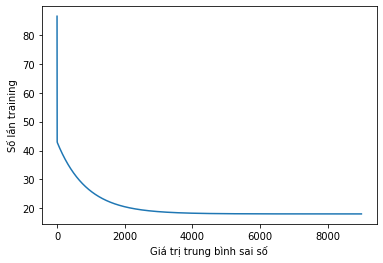

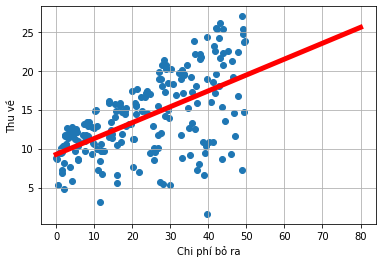

In [ ]:
# Chạy B2 để dự đoán dữ liệu 
print("Ket qua")
print("weight = ",weight)
print("bias = ", bias)
# print(cos_his)
print("Gia tri du doan")
print(predict(19 ,weight,  bias))
print(predict(41 ,weight,  bias))

plt.plot(solanlap , cos_his)
plt.ylabel('Số lần training')
plt.xlabel('Giá trị trung bình sai số')
plt.show()

plt.scatter(X_data,Y_data,marker = 'o')
# Vẽ đồ thị với 2 giá trị đầu vào thể hiện được các điểm khả dụng nhất để dự đoán 
# thay 2 giá trị radio lần lượt là 0 và 80 ta có thể vẽ đường dự đoán 
plt.plot([0 ,80] , [(predict(0 ,weight,  bias)) , (predict(80 ,weight,  bias))],label='Dự đoán ', linewidth=5, color="red")
plt.ylabel('Thu về')
plt.xlabel('Chi phí bỏ ra')

plt.grid(True)

plt.show()